In [ ]:
print("Hello World!")
print('hello')

In [4]:
import pandas as pd

In [89]:
agg_dict ={'Age':'mean',
           'Experience_Years': 'min',
           'Salary' : 'max'
          }
df_pd1.agg(agg_dict)

Age                 3.548571e+01
Experience_Years    1.000000e+00
Salary              1.000000e+07
dtype: float64

In [3]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark= SparkSession.builder.appName('Test').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/09 09:28:39 WARN Utils: Your hostname, Gyanas-MacBook-Air.local, resolves to a loopback address: 127.0.0.1; using 192.168.1.5 instead (on interface en0)
25/10/09 09:28:39 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/09 09:28:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

In [5]:
df_spark=spark.read.option('header','true').option('inferSchema','true').csv('/Users/gyanapradhan/Desktop/Employee_Salary_Dataset.csv')

In [31]:
df_spark

DataFrame[ID: int, Experience_Years: int, Age: int, Gender: string, Salary: int]

In [6]:
df_spark.show()


+---+----------------+---+------+-------+
| ID|Experience_Years|Age|Gender| Salary|
+---+----------------+---+------+-------+
|  1|               5| 28|Female| 250000|
|  2|               1| 21|  Male|  50000|
|  3|               3| 23|Female| 170000|
|  4|               2| 22|  Male|  25000|
|  5|               1| 17|  Male|  10000|
|  6|              25| 62|  Male|5001000|
|  7|              19| 54|Female| 800000|
|  8|               2| 21|Female|   9000|
|  9|              10| 36|Female|  61500|
| 10|              15| 54|Female| 650000|
| 11|               4| 26|Female| 250000|
| 12|               6| 29|  Male|1400000|
| 13|              14| 39|  Male|6000050|
| 14|              11| 40|  Male| 220100|
| 15|               2| 23|  Male|   7500|
| 16|               4| 27|Female|  87000|
| 17|              10| 34|Female| 930000|
| 18|              15| 54|Female|7900000|
| 19|               2| 21|  Male|  15000|
| 20|              10| 36|  Male| 330000|
+---+----------------+---+------+-

TypeError: 'Column' object is not callable

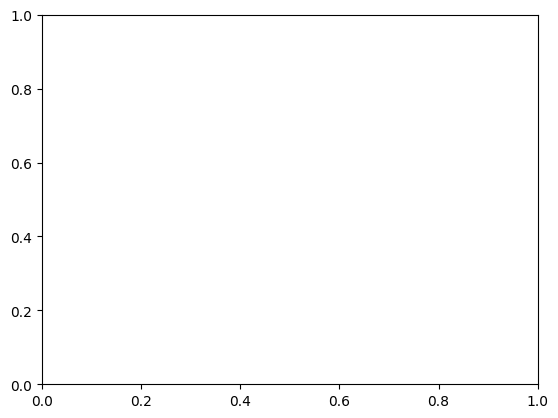

In [11]:
import  matplotlib.pyplot as plt
#%matplotlib inline
#plt.scatter(df_spark["Experience_Years"],df_spark["Salary"],color='red',marker='+')

In [36]:
df_spark.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Experience_Years: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Salary: integer (nullable = true)



In [37]:
print (df_spark)

DataFrame[ID: int, Experience_Years: int, Age: int, Gender: string, Salary: int]


In [45]:
df_pyspark= spark.read.csv("/Users/gyanapradhan/Desktop/Employee_Salary_Dataset.csv", header=True,inferSchema=True)

In [53]:
df_spark=spark.read.option('header','True').option('inferSchema','True').csv("/Users/gyanapradhan/Desktop/Employee_Salary_Dataset.csv")

In [47]:
type(df_spark)

pyspark.sql.classic.dataframe.DataFrame

In [49]:
spark

In [54]:
df_spark.show()


+---+----------------+---+------+-------+
| ID|Experience_Years|Age|Gender| Salary|
+---+----------------+---+------+-------+
|  1|               5| 28|Female| 250000|
|  2|               1| 21|  Male|  50000|
|  3|               3| 23|Female| 170000|
|  4|               2| 22|  Male|  25000|
|  5|               1| 17|  Male|  10000|
|  6|              25| 62|  Male|5001000|
|  7|              19| 54|Female| 800000|
|  8|               2| 21|Female|   9000|
|  9|              10| 36|Female|  61500|
| 10|              15| 54|Female| 650000|
| 11|               4| 26|Female| 250000|
| 12|               6| 29|  Male|1400000|
| 13|              14| 39|  Male|6000050|
| 14|              11| 40|  Male| 220100|
| 15|               2| 23|  Male|   7500|
| 16|               4| 27|Female|  87000|
| 17|              10| 34|Female| 930000|
| 18|              15| 54|Female|7900000|
| 19|               2| 21|  Male|  15000|
| 20|              10| 36|  Male| 330000|
+---+----------------+---+------+-

In [609]:
df_spark.show(2, truncate=False)

+---+----------------+---+------+------+
|ID |Experience_Years|Age|Gender|Salary|
+---+----------------+---+------+------+
|1  |5               |28 |Female|250000|
|2  |1               |21 |Male  |50000 |
+---+----------------+---+------+------+
only showing top 2 rows


In [107]:
df_sparkM=df_spark.withColumn('Salarywith hike', df_spark['Salary']*1.1)


In [100]:
df_sparkM.withColumn('office',df_spark['Gender'])


DataFrame[ID: int, Experience_Years: int, Age: int, Gender: string, Salary: int, Salarywith hike: double, office: string]

In [104]:
df_sparkM.drop(df_sparkM["Salarywith hike"]).show()

+---+----------------+---+------+-------+
| ID|Experience_Years|Age|Gender| Salary|
+---+----------------+---+------+-------+
|  1|               5| 28|Female| 250000|
|  2|               1| 21|  Male|  50000|
|  3|               3| 23|Female| 170000|
|  4|               2| 22|  Male|  25000|
|  5|               1| 17|  Male|  10000|
|  6|              25| 62|  Male|5001000|
|  7|              19| 54|Female| 800000|
|  8|               2| 21|Female|   9000|
|  9|              10| 36|Female|  61500|
| 10|              15| 54|Female| 650000|
| 11|               4| 26|Female| 250000|
| 12|               6| 29|  Male|1400000|
| 13|              14| 39|  Male|6000050|
| 14|              11| 40|  Male| 220100|
| 15|               2| 23|  Male|   7500|
| 16|               4| 27|Female|  87000|
| 17|              10| 34|Female| 930000|
| 18|              15| 54|Female|7900000|
| 19|               2| 21|  Male|  15000|
| 20|              10| 36|  Male| 330000|
+---+----------------+---+------+-

In [105]:
df_sparkM.show()

+---+----------------+---+------+-------+------------------+
| ID|Experience_Years|Age|Gender| Salary|   Salarywith hike|
+---+----------------+---+------+-------+------------------+
|  1|               5| 28|Female| 250000|          275000.0|
|  2|               1| 21|  Male|  50000| 55000.00000000001|
|  3|               3| 23|Female| 170000|187000.00000000003|
|  4|               2| 22|  Male|  25000|27500.000000000004|
|  5|               1| 17|  Male|  10000|           11000.0|
|  6|              25| 62|  Male|5001000|         5501100.0|
|  7|              19| 54|Female| 800000| 880000.0000000001|
|  8|               2| 21|Female|   9000|            9900.0|
|  9|              10| 36|Female|  61500|           67650.0|
| 10|              15| 54|Female| 650000|          715000.0|
| 11|               4| 26|Female| 250000|          275000.0|
| 12|               6| 29|  Male|1400000|1540000.0000000002|
| 13|              14| 39|  Male|6000050| 6600055.000000001|
| 14|              11| 4

In [106]:
df_sparkM.drop(df_sparkM['Salarywith hike']).show()

+---+----------------+---+------+-------+
| ID|Experience_Years|Age|Gender| Salary|
+---+----------------+---+------+-------+
|  1|               5| 28|Female| 250000|
|  2|               1| 21|  Male|  50000|
|  3|               3| 23|Female| 170000|
|  4|               2| 22|  Male|  25000|
|  5|               1| 17|  Male|  10000|
|  6|              25| 62|  Male|5001000|
|  7|              19| 54|Female| 800000|
|  8|               2| 21|Female|   9000|
|  9|              10| 36|Female|  61500|
| 10|              15| 54|Female| 650000|
| 11|               4| 26|Female| 250000|
| 12|               6| 29|  Male|1400000|
| 13|              14| 39|  Male|6000050|
| 14|              11| 40|  Male| 220100|
| 15|               2| 23|  Male|   7500|
| 16|               4| 27|Female|  87000|
| 17|              10| 34|Female| 930000|
| 18|              15| 54|Female|7900000|
| 19|               2| 21|  Male|  15000|
| 20|              10| 36|  Male| 330000|
+---+----------------+---+------+-

In [111]:
df= df_spark.join(df_sparkM)

In [119]:
df.drop('Gender').show()

+---+----------------+---+-------+---+----------------+---+------+---------------+
| ID|Experience_Years|Age| Salary| ID|Experience_Years|Age|Salary|Salarywith hike|
+---+----------------+---+-------+---+----------------+---+------+---------------+
|  1|               5| 28| 250000|  1|               5| 28|250000|       275000.0|
|  2|               1| 21|  50000|  1|               5| 28|250000|       275000.0|
|  3|               3| 23| 170000|  1|               5| 28|250000|       275000.0|
|  4|               2| 22|  25000|  1|               5| 28|250000|       275000.0|
|  5|               1| 17|  10000|  1|               5| 28|250000|       275000.0|
|  6|              25| 62|5001000|  1|               5| 28|250000|       275000.0|
|  7|              19| 54| 800000|  1|               5| 28|250000|       275000.0|
|  8|               2| 21|   9000|  1|               5| 28|250000|       275000.0|
|  9|              10| 36|  61500|  1|               5| 28|250000|       275000.0|
| 10

In [120]:
df.drop("Salarywith hike")

DataFrame[ID: int, Experience_Years: int, Age: int, Gender: string, Salary: int, ID: int, Experience_Years: int, Age: int, Gender: string, Salary: int, Salarywith hike: double]

In [246]:
df_sparkM.withColumnRenamed("Salarywith hike","NewSalary")


DataFrame[ID: int, Experience_Years: int, Age: int, Gender: string, Salary: int, NewSalary: double]

In [188]:
df_sparkM.filter( "Salary > 5000 and Gender = 'Male' and Age >50 ").show()

+---+----------------+---+------+-------+-----------------+
| ID|Experience_Years|Age|Gender| Salary|  Salarywith hike|
+---+----------------+---+------+-------+-----------------+
|  6|              25| 62|  Male|5001000|        5501100.0|
| 21|              15| 54|  Male|6570000|7227000.000000001|
| 32|              15| 54|  Male| 900000|990000.0000000001|
+---+----------------+---+------+-------+-----------------+



In [243]:
df_sparkM.filter((df_sparkM.Salary >5000)& (df_sparkM.Gender =='Male') & (df_sparkM.Age> 50))

DataFrame[ID: int, Experience_Years: int, Age: int, Gender: string, Salary: int, Salarywith hike: double]

In [441]:
df_sparkM.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Experience_Years: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Salary: integer (nullable = true)
 |-- Salarywith hike: double (nullable = true)



In [269]:
df_sparkM.filter(df_sparkM.Age.isNull()).show()

+---+----------------+---+------+------+---------------+
| ID|Experience_Years|Age|Gender|Salary|Salarywith hike|
+---+----------------+---+------+------+---------------+
+---+----------------+---+------+------+---------------+



In [357]:

df_missV = spark.read.csv("/Users/gyanapradhan/Desktop/MissingValue.csv",header=True,inferSchema=True)

In [391]:
df_missV.select(df_missV.age,df_missV.Name,df_missV.Salary,df_missV.Experience).show()

+----+---------+------+----------+
| age|     Name|Salary|Experience|
+----+---------+------+----------+
|  31|    Krish| 30000|        10|
|  30|Sudhanshu| 25000|         8|
|  29|    Sunny| 20000|         4|
|  24|     Paul| 20000|         3|
|  21|   Harsha| 15000|         1|
|  23|  Shubham| 18000|         2|
|NULL|   Mahesh| 40000|      NULL|
|  34|     NULL| 38000|        10|
|  36|     NULL|  NULL|      NULL|
+----+---------+------+----------+



In [402]:

df_missV.na.drop(how='any',subset =['Experience','age'] ).show()


+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|     NULL| 34|        10| 38000|
+---------+---+----------+------+



In [406]:
df_missV.na.fill({"age":20, "Name": 'unknown',"Experience" :50}).show()


+---------+---+----------+------+
|     Name|age|Experience|Salary|
+---------+---+----------+------+
|    Krish| 31|        10| 30000|
|Sudhanshu| 30|         8| 25000|
|    Sunny| 29|         4| 20000|
|     Paul| 24|         3| 20000|
|   Harsha| 21|         1| 15000|
|  Shubham| 23|         2| 18000|
|   Mahesh| 20|        50| 40000|
|  unknown| 34|        10| 38000|
|  unknown| 36|        50|  NULL|
+---------+---+----------+------+



In [414]:
df_missV.na.fill(value='unknown',subset=['Name','age','Experience']).show()

+---------+----+----------+------+
|     Name| age|Experience|Salary|
+---------+----+----------+------+
|    Krish|  31|        10| 30000|
|Sudhanshu|  30|         8| 25000|
|    Sunny|  29|         4| 20000|
|     Paul|  24|         3| 20000|
|   Harsha|  21|         1| 15000|
|  Shubham|  23|         2| 18000|
|   Mahesh|NULL|      NULL| 40000|
|  unknown|  34|        10| 38000|
|  unknown|  36|      NULL|  NULL|
+---------+----+----------+------+



In [439]:
from pyspark.ml.feature import Imputer
imput=Imputer(inputCols=['age','Experience','Salary'],
             outputCols=["{}_imputed".format(i)for i in['age','Experience','Salary']]).setStrategy('mean')

In [542]:
df_train= imput.fit(df_missV).transform(df_missV)

In [460]:
df_missV.groupBy("Name").max('age','Salary').show()

+---------+--------+-----------+
|     Name|max(age)|max(Salary)|
+---------+--------+-----------+
|     NULL|      36|      38000|
|Sudhanshu|      30|      25000|
|    Sunny|      29|      20000|
|    Krish|      31|      30000|
|   Harsha|      21|      15000|
|     Paul|      24|      20000|
|  Shubham|      23|      18000|
|   Mahesh|    NULL|      40000|
+---------+--------+-----------+



In [545]:
df_trainimput=df_train.drop('age','Experience','Salary')

In [548]:
df_trainimput.show()

+---------+-----------+------------------+--------------+
|     Name|age_imputed|Experience_imputed|Salary_imputed|
+---------+-----------+------------------+--------------+
|    Krish|         31|                10|         30000|
|Sudhanshu|         30|                 8|         25000|
|    Sunny|         29|                 4|         20000|
|     Paul|         24|                 3|         20000|
|   Harsha|         21|                 1|         15000|
|  Shubham|         23|                 2|         18000|
|   Mahesh|         28|                 5|         40000|
|     NULL|         34|                10|         38000|
|     NULL|         36|                 5|         25750|
+---------+-----------+------------------+--------------+



In [475]:
df_missV.agg({'Salary': 'avg','Age': 'Max'}).show()

+-----------+--------+
|avg(Salary)|max(Age)|
+-----------+--------+
|    25750.0|      36|
+-----------+--------+



In [520]:
df_missV.printSchema()

root
 |-- Name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: integer (nullable = true)
 |-- Salary: integer (nullable = true)



In [538]:
from pyspark.ml.feature import VectorAssembler


In [549]:
df_augmented =VectorAssembler(inputCols=['age_imputed','Experience_imputed'],outputCol='IndepedentFeatures')

In [577]:
augdataset=df_augmented.transform(df_trainimput)

In [581]:
augdataset.na.fill({"Name":"unknown"})

DataFrame[Name: string, age_imputed: int, Experience_imputed: int, Salary_imputed: int, IndepedentFeatures: vector]

In [611]:
finaldataset=augdataset.select('IndepedentFeatures','Salary_imputed')

In [612]:
finaldataset.select('IndepedentFeatures').show()

+------------------+
|IndepedentFeatures|
+------------------+
|       [31.0,10.0]|
|        [30.0,8.0]|
|        [29.0,4.0]|
|        [24.0,3.0]|
|        [21.0,1.0]|
|        [23.0,2.0]|
|        [28.0,5.0]|
|       [34.0,10.0]|
|        [36.0,5.0]|
+------------------+



In [553]:
from pyspark.ml.regression import LinearRegression

In [563]:
 train , test = finaldataset.randomSplit([.80,.20])

In [615]:
dataF= test.select("IndepedentFeatures")

In [616]:
dataF.show()

+------------------+
|IndepedentFeatures|
+------------------+
|        [36.0,5.0]|
+------------------+



In [621]:
model = LinearRegression(featuresCol='IndepedentFeatures',labelCol='Salary_imputed')

In [636]:
predictor=model.fit(train)

25/10/02 18:26:41 WARN Instrumentation: [00e4eb45] regParam is zero, which might cause numerical instability and overfitting.


AttributeError: 'LinearRegressionModel' object has no attribute 'show'

In [634]:
prediction = predictor.transform(dataF)

In [638]:
model.fit(train).transform(dataF).show()

25/10/02 18:27:59 WARN Instrumentation: [46306e46] regParam is zero, which might cause numerical instability and overfitting.


+------------------+-----------------+
|IndepedentFeatures|       prediction|
+------------------+-----------------+
|        [36.0,5.0]|37166.07528540454|
+------------------+-----------------+



In [635]:
prediction.show(2, truncate=False)

+------------------+-----------------+
|IndepedentFeatures|prediction       |
+------------------+-----------------+
|[36.0,5.0]        |37166.07528540454|
+------------------+-----------------+



In [639]:
predictor.intercept

-13044.353594566677

In [640]:
predictor.coefficients

DenseVector([1355.523, 282.3203])